# SI 650 / EECS 549: Homework 1 — 

##  Probabilities, Text, and Ranking

- Name: Sijun Tao
- Uniquename: sijuntao

In [1]:
import numpy as np
import pandas as pd
import math
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from heapq import nlargest
from IPython.display import Latex

<hr style="border: 1px solid #003262;" />

## Part 1: Probabilistic Reasoning and Bayes Rule

### a)

\begin{array}{c|cccc}
\mathrm{S} & P(B=1 \mid S) & P(U=1 \mid S) & P(E=1 \mid S) & \text { prior } P(S) \\
\hline 
1 & 0.57 & 0.57 & 0.43 & 0.47 \\
0 & 0.75 & 0.50 & 0.38 & 0.53
\end{array}


### b)


$$
\begin{aligned}
P(S=1|B=0,U=1,E=0)
&=\frac{P(S=1,B=0,U=1,E=0)}{P(B=0,U=1,E=0)}\\
&=\frac{P(B=0,U=1,E=0|S=1)*P(S=1)}{P(B=0,U=1,E=0|S=1)*P(S=1) + P(B=0,U=1,E=0|S=0)*P(S=0)}\\
&=\frac{P(B=0|S=1)P(U=1|S=1)P(E=0|S=1)*P(S=1)}{P(B=0,U=1,E=0|S=1)*P(S=1) + P(B=0,U=1,E=0|S=0)*P(S=0)}\\
&=\frac{\frac{3}{7}\times\frac{4}{7}\times\frac{4}{7}\times \frac{7}{15}}{\frac{3}{7}\times\frac{4}{7}\times\frac{4}{7}\times \frac{7}{15} + \frac{1}{4}\times\frac{1}{2}\times\frac{5}{8}\times \frac{8}{15}}\\
&= \frac{384}{629} \\
&\approx 0.61
\end{aligned}
$$

$$
\begin{aligned}
P(S=0|B=0,U=1,E=0)
&=\frac{P(S=0,B=0,U=1,E=0)}{P(B=0,U=1,E=0)}\\
&=\frac{P(B=0,U=1,E=0|S=0)*P(S=0)}{P(B=0,U=1,E=0|S=0)*P(S=0) + P(B=0,U=1,E=0|S=1)*P(S=1)}\\
&=\frac{P(B=0|S=0)P(U=1|S=0)P(E=0|S=0)*P(S=0)}{P(B=0,U=1,E=0|S=0)*P(S=0) + P(B=0,U=1,E=0|S=1)*P(S=1)}\\
&=\frac{\frac{1}{4}\times\frac{1}{2}\times\frac{5}{8}\times \frac{8}{15}}{ \frac{1}{4}\times\frac{1}{2}\times\frac{5}{8}\times \frac{8}{15} + \frac{3}{7}\times\frac{4}{7}\times\frac{4}{7}\times \frac{7}{15}}\\
&= \frac{245}{629} \\
&\approx 0.39
\end{aligned}
$$


We can find that 

$$
P(S=1|B=0,U=1,E=0) > P(S = 0|B = 0,U = 1,E = 0)
$$

Therefore, the account $ a $ is a spam.

### c)


$$
\begin{aligned}
P(S=1|B=0,U=1,E=0) = unknown \\
P(S=0|B=0,U=1,E=0) = unknown
\end{aligned}
$$

The result is different from the previous in problem B.

This is because the sample size is too small. None of the samples satisfy the condition that B=0, U=1, and E=0, so we can't get the probability directly from the samples. Probabilities calculated in this way are of little use because the results are not representative.

### d)

No. There are some constraints that we should follow:
- $P(S=1) + P(S=0) = 1$
- $P(X=1 \mid S) + P(X=0 \mid S) = 1$  for $X \in$ {$B,U,E$} (though not mentioned in this table)

### e)

**No**. If we want to change the conclusion, we need to lower $P(S=1|B=0,U=1,E=0)$ to be less than 0.5. Analyzing the calculation formula, we can see that we can achieve this by increasing $P(E=0|S=0)$ or $P(E=1|S=1)$. Since we can only change the value $E$ in one example:

- if we choose to increase $P(E=0|S=0)$, we can change the value $E$ of the 15th sample to be 0, then the table 2 becomes:

\begin{array}{c|cccc}
\mathrm{S} & P(B=1 \mid S) & P(U=1 \mid S) & P(E=1 \mid S) & \text { prior } P(S) \\
\hline 
1 & 0.57 & 0.57 & 0.43 & 0.47 \\
0 & 0.75 & 0.50 & 0.25 & 0.53
\end{array}


Then the probability becomes:

$$
\begin{aligned}
P(S=1|B=0,U=1,E=0)
&=\frac{P(S=1,B=0,U=1,E=0)}{P(B=0,U=1,E=0)}\\
&=\frac{P(B=0,U=1,E=0|S=1)*P(S=1)}{P(B=0,U=1,E=0|S=1)*P(S=1) + P(B=0,U=1,E=0|S=0)*P(S=0)}\\
&=\frac{\frac{3}{7}\times\frac{4}{7}\times\frac{4}{7}\times \frac{7}{15}}{\frac{3}{7}\times\frac{4}{7}\times\frac{4}{7}\times \frac{7}{15} + \frac{1}{4}\times\frac{1}{2}\times\frac{3}{4}\times \frac{8}{15}}\\
&= \frac{64}{113} \\
&\approx 0.57
\end{aligned}
$$

The probability 0.57 is still greater than 0.5, so in this case the conclusion will not change.

- if we choose to increase $P(E=1|S=1)$, we can change the value $E$ of the 9th sample to be 1, then the table 2 becomes:

\begin{array}{c|cccc}
\mathrm{S} & P(B=1 \mid S) & P(U=1 \mid S) & P(E=1 \mid S) & \text { prior } P(S) \\
\hline 
1 & 0.57 & 0.57 & 0.57 & 0.47 \\
0 & 0.75 & 0.50 & 0.38 & 0.53
\end{array}


Then the probability becomes:

$$
\begin{aligned}
P(S=1|B=0,U=1,E=0)
&=\frac{P(S=1,B=0,U=1,E=0)}{P(B=0,U=1,E=0)}\\
&=\frac{P(B=0,U=1,E=0|S=1)*P(S=1)}{P(B=0,U=1,E=0|S=1)*P(S=1) + P(B=0,U=1,E=0|S=0)*P(S=0)}\\
&=\frac{\frac{3}{7}\times\frac{4}{7}\times\frac{3}{7}\times \frac{7}{15}}{\frac{3}{7}\times\frac{4}{7}\times\frac{3}{7}\times \frac{7}{15} + \frac{1}{4}\times\frac{1}{2}\times\frac{5}{8}\times \frac{8}{15}}\\
&= \frac{288}{533} \\
&\approx 0.54
\end{aligned}
$$

The probability 0.54 is still greater than 0.5, so in this case the conclusion will not change.

**Therefore, the conclusion of problem b that account $a$ is a spam cannot be changed by only changing the value E in one example of Table 1.**

### f)

In fact, the independence assumption of $P(B, U, E|S) = P(B|S)P(U|S)P(E|S)$ does not necessarily hold, because B, U and E are not necessarily independent of each other. For example, if an account uses a URL, it may be more likely to have the word "based" and less likely to have an emoji in its bio. Because of the possible intrinsic relationship between them, {B, U, E} cannot be simply regarded as independent in reality and cannot be directly applied to the independence assumption.

<hr style="border: 1px solid #003262;" />

## Part 2: Text Data Analyses

In [2]:
# load nlp
nlp = spacy.load("en_core_web_sm")

In [3]:
# reload stop words
with open("stoplist.txt", "r") as file:
    stopwords = file.readlines()
stopwords = {str.replace("\n", "") for str in stopwords} # turn it into a list of string
nlp.Defaults.stop_words -= nlp.Defaults.stop_words
nlp.Defaults.stop_words |= stopwords

In [4]:
# load and process the documents

def load_doc(filename):
    with open(filename, "r") as file:
        data = file.readlines()
    data = [line.replace("\n","") for line in data]
    doc_data = []
    for line in data:
        proc_line = nlp(line)
        doc_data.append(proc_line)
    return doc_data


doc_reddit = load_doc("reddit-questions.10k.f22.txt")
doc_wiki = load_doc("wiki-bios.10k.f22.txt")

### 1.

In [5]:
# compute the frequency of words in documents

def word_fre(doc):
    word_count_dict = {}
    for line in doc:
        for token in line:
            # make sure the token is a word (stopwords not included)
            if token.is_stop != True and token.is_punct != True and token.like_url != True and token.like_email != True:
                if token.text not in word_count_dict.keys():
                    word_count_dict[token.text] = 1
                else:
                    word_count_dict[token.text] += 1
                    
    # the sorted word counts                
    word_counts = sorted(word_count_dict.values(), reverse=True)
    return word_count_dict, word_counts
                
reddit_dict, reddit_freq = word_fre(doc_reddit)  
wiki_dict, wiki_freq = word_fre(doc_wiki)

The word frequency of words in 'reddit-questions.10k.f22.txt':


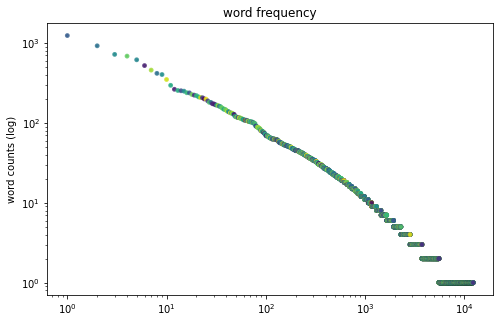

The word frequency of words in 'wiki-bios.10k.f22.txt':


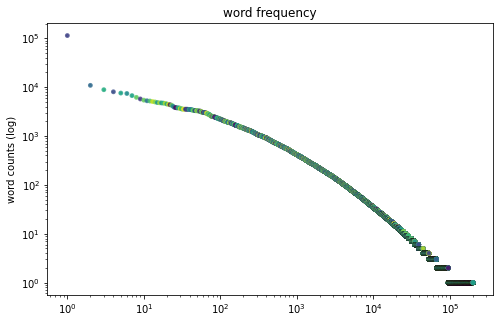

In [6]:
# plot the frequency distribution of words

def plot_word_fre(freq):
    fig, ax = plt.subplots(figsize=(8, 5))
    
    colors = np.random.rand(len(freq))
    plt.scatter(range(1, len(freq)+1), freq, s=8, c=colors, linewidths = 2, alpha = 0.8, marker = 'o')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.ylabel('word counts (log)')
    plt.title('word frequency')
    
    plt.show()  

    
print("The word frequency of words in 'reddit-questions.10k.f22.txt':")
plot_word_fre(reddit_freq)
print("The word frequency of words in 'wiki-bios.10k.f22.txt':")
plot_word_fre(wiki_freq)

Two plots both look like a power-law distribution. The two distribution are similar distribution shape while the scales are different. The plot for reddit has a x scale of 10^4 and y scale of 10^3, while the plot for wiki has a x scale of 10^5 and y scale of 10^4, but they follow the same distribution.

### 2.

a)

In [7]:
def stopwords_fre(doc):
    whole_count = 0.0
    stop_count = 0.0
    for line in doc:
        for token in line:
            # make sure the token is a word
            if token.is_punct != True and token.like_url != True and token.like_num != True and token.like_email != True:
                whole_count += 1
                if token.is_stop:
                    stop_count += 1
    return stop_count/whole_count

reddit_stopwords_fre = stopwords_fre(doc_reddit)
wiki_stopwords_fre = stopwords_fre(doc_wiki)
print(f"The stopwords frequency in 'reddit-questions.10k.f22.txt': {reddit_stopwords_fre} \n")
print(f"The stopwords frequency in 'wiki-bios.10k.f22.txt': {wiki_stopwords_fre} ")

The stopwords frequency in 'reddit-questions.10k.f22.txt': 0.6155150563161559 

The stopwords frequency in 'wiki-bios.10k.f22.txt': 0.39431277871191167 


**These two frequencies are different.** This may be because the Reddit questions use more daily expression, while the Wiki bios use more professional or long sentences. Therefore, the stopwords frequency in Wiki bios is lower than that of the Reddit questions.

b)

In [8]:
def cap_per(doc):
    whole_count = 0
    cap_count = 0
    for line in doc:
        for token in line:
            for char in token.text:
                if char.isalpha():
                    whole_count += 1
                    if char.isupper():
                        cap_count += 1
    return cap_count / whole_count

reddit_cap_per = cap_per(doc_reddit)
wiki_cap_per = cap_per(doc_wiki)
print(f"The percentage of capital letters in 'reddit-questions.10k.f22.txt': {reddit_cap_per} \n")
print(f"The percentage of capital letters in 'wiki-bios.10k.f22.txt': {wiki_cap_per} ")

The percentage of capital letters in 'reddit-questions.10k.f22.txt': 0.029704376288239447 

The percentage of capital letters in 'wiki-bios.10k.f22.txt': 0.07609871733543555 


**These two percentages are different.** This may be because the Wiki bios has more proper noun，Standby Equipment and names, while the Reddit questions does not have much. Therefore, the percentage of capital letters in Wiki bios is higher than that of the Reddit questions.

c)

In [9]:
def avg_char_word(doc):
    word_count = 0
    char_count = 0
    for line in doc:
        for token in line:
            # make sure the token is a word
            if token.is_punct != True and token.like_url != True and token.like_num != True and token.like_email != True:
                word_count += 1
                for char in token.text:
                    char_count += 1
    return char_count / word_count

reddit_avg_char_word = avg_char_word(doc_reddit)
wiki_avg_char_word = avg_char_word(doc_wiki)
print(f"The average number of characters per word in 'reddit-questions.10k.f22.txt': {reddit_avg_char_word} \n")
print(f"The average number of characters per word in 'wiki-bios.10k.f22.txt': {wiki_avg_char_word} ")

The average number of characters per word in 'reddit-questions.10k.f22.txt': 4.230482718407321 

The average number of characters per word in 'wiki-bios.10k.f22.txt': 4.913603802252565 


**These two values are different.** This may be because the Wiki bios has more terminology，standby equipment names and ancient people names, while the Reddit questions does not have much. Therefore, the average number of characters per word in Wiki bios is higher than that of the Reddit questions.

d)

In [10]:
def pos_count(doc):
    word_count = 0
    n_count = 0
    adj_count = 0
    v_count = 0
    adv_count = 0
    pron_count = 0
    for line in doc:
        for token in line:
            # make sure the token is a word
            if token.is_alpha and token.like_url != True and token.like_num != True and token.like_email != True:
                word_count += 1
                if (token.pos_ == "NOUN"): n_count += 1
                if (token.pos_ == "ADJ"): adj_count += 1
                if (token.pos_ == "VERB"): v_count += 1
                if (token.pos_ == "ADV"): adv_count += 1
                if (token.pos_ == "PRON"): pron_count += 1
    return n_count / word_count, adj_count / word_count, v_count / word_count, adv_count / word_count, pron_count / word_count


reddit_n,reddit_adj,reddit_v,reddit_adv,reddit_pron = pos_count(doc_reddit)
wiki_n,wiki_adj,wiki_v,wiki_adv,wiki_pron = pos_count(doc_wiki)
print(f"In 'reddit-questions.10k.f22.txt', the percentage of: \n nouns: {reddit_n} \n adjectives: {reddit_adj}\n verbs: {reddit_v}\n adverbs: {reddit_adv}\n pronouns: {reddit_pron}\n")
print(f"In 'wiki-bios.10k.f22.txt', the percentage of: \n nouns: {wiki_n} \n adjectives: {wiki_adj}\n verbs: {wiki_v}\n adverbs: {wiki_adv}\n pronouns: {wiki_pron}")

In 'reddit-questions.10k.f22.txt', the percentage of: 
 nouns: 0.18508651872128262 
 adjectives: 0.07237999804477466
 verbs: 0.13008358588327304
 adverbs: 0.04297218691954248
 pronouns: 0.18109663701241568

In 'wiki-bios.10k.f22.txt', the percentage of: 
 nouns: 0.16759768714198905 
 adjectives: 0.05242014833023474
 verbs: 0.09141939657246316
 adverbs: 0.021821595890356905
 pronouns: 0.05206959958270188


**These values are different.** The Reddit questions use more content words to convey their ideas to others, while the Wiki bios use more professional languages. Therefore, the percentage in Wiki bios is lower than that of the Reddit questions.

e)

In [11]:
def top10_pos_dict(doc):
    n_dict = {}
    v_dict = {}
    adj_dict = {}
    for line in doc:
        for token in line:
            # make sure the token is a word
            if (token.is_alpha):
                if (token.pos_ == "NOUN"): 
                    if token.text not in n_dict.keys():
                        n_dict[token.text] = 1
                    else:
                        n_dict[token.text] += 1
                if (token.pos_ == "VERB"):
                    if token.text not in v_dict.keys():
                        v_dict[token.text] = 1
                    else:
                        v_dict[token.text] += 1
                if (token.pos_ == "ADJ"): 
                    if token.text not in adj_dict.keys():
                        adj_dict[token.text] = 1
                    else:
                        adj_dict[token.text] += 1
#     n_dict = sorted(n_dict.items(), key=lambda x: x[1],reverse = True)
#     v_dict = sorted(v_dict.items(), key=lambda x: x[1],reverse = True)
#     adj_dict = sorted(adj_dict.items(), key=lambda x: x[1],reverse = True)
    n_dict = nlargest(10, n_dict, key = n_dict.get)
    v_dict = nlargest(10, v_dict, key = v_dict.get)
    adj_dict = nlargest(10, adj_dict, key = adj_dict.get)
    return n_dict,v_dict,adj_dict

reddit_n_dict,reddit_v_dict,reddit_adj_dict = top10_pos_dict(doc_reddit)
wiki_n_dict,wiki_v_dict,wiki_adj_dict = top10_pos_dict(doc_wiki)
print("In 'reddit-questions.10k.f22.txt', the top 10 nouns:")
display(reddit_n_dict)
print("the top 10 verbs:") 
display(reddit_v_dict)
print("the top 10 adjectives: ")
display(reddit_adj_dict )

print("\n In 'wiki-bios.10k.f22.txt', the top 10 nouns:")
display(wiki_n_dict)
print("the top 10 verbs:") 
display(wiki_v_dict)
print("the top 10 adjectives: ")
display(wiki_adj_dict )

In 'reddit-questions.10k.f22.txt', the top 10 nouns:


['thing',
 'people',
 'reddit',
 'People',
 'life',
 'time',
 'person',
 'way',
 'things',
 'story']

the top 10 verbs:


['do', 'have', 'had', 'think', 'get', 'know', 'make', 'seen', 'made', 'want']

the top 10 adjectives: 


['best',
 'worst',
 'good',
 'other',
 'first',
 'weirdest',
 'favorite',
 'Serious',
 'most',
 'last']


 In 'wiki-bios.10k.f22.txt', the top 10 nouns:


['time',
 'years',
 'year',
 'season',
 'team',
 'career',
 'member',
 'film',
 'work',
 'life']

the top 10 verbs:


['born',
 'played',
 'became',
 'made',
 'had',
 'won',
 'died',
 'served',
 'known',
 'including']

the top 10 adjectives: 


['first',
 'External',
 'American',
 'second',
 'other',
 'former',
 'new',
 'many',
 'several',
 'Early']

**These words are different.** This may be because the topic of Reddit questions focus more on daily events, while the Wiki bios focus on ancient or famous events. Therefore, the top 10 nouns, verbs, and adjectives are different in the Wiki bios and the Reddit questions.

### 3.

In [12]:
def TF(term, doc):
    count = 0
    for token in doc:
        if term.text == token.text:
            count += 1
    return math.log(count + 1)

def IDF(term, docs = doc_wiki):
    N = len(docs)
    k = 0
    for line in docs:
        for token in line:
            if term.text == token.text:
                k += 1
                break             
    return 1 + math.log(N / k)    

def TF_IDF(doc):
    tf_idf_weight_dict = {}
    for token in doc:
        # make sure the word is not a stopword or a punctuation
        if token.is_stop != True and token.is_punct != True:
            if token.text not in tf_idf_weight_dict.keys():
                tf_idf_weight_dict[token.text] = TF(token, doc) * IDF(token)
    return nlargest(5, tf_idf_weight_dict, key = tf_idf_weight_dict.get)

n = 1
for doc in doc_wiki[0:10]:
    word_list = TF_IDF(doc)
    print(f"the 5 words that have the highest TF-IDF weights in doc {n}:", word_list)
    n += 1

the 5 words that have the highest TF-IDF weights in doc 1: ['Kearney', 'Shrewsbury', 'Chester', 'Reading', 'soccer']
the 5 words that have the highest TF-IDF weights in doc 2: ['Symo', '1913–1992', 'Autobus', 'Triana', 'Tiszavirág']
the 5 words that have the highest TF-IDF weights in doc 3: ['Champion', '1774', '1793', 'Miranpur', 'Hatchlands']
the 5 words that have the highest TF-IDF weights in doc 4: ['Merrett', 'Michelin', 'chef', 'Dining', 'Paul']
the 5 words that have the highest TF-IDF weights in doc 5: ['Smit', 'Telstar', 'PSV', 'Heerhugowaard', 'Beijen']
the 5 words that have the highest TF-IDF weights in doc 6: ['Sadat', 'Thirstin', 'Howl', 'Tell', 'Grae']
the 5 words that have the highest TF-IDF weights in doc 7: ['Nikolayenko', 'bears', 'bear', 'Kamchatka', 'Kronotsky']
the 5 words that have the highest TF-IDF weights in doc 8: ['AKP', 'Erdoğan', 'Afyonkarahisar', 'Recep', 'Tayyip']
the 5 words that have the highest TF-IDF weights in doc 9: ['Jury', 'UFC', 'fight', 'Bellator

**I find that the words that have the highest TF-IDF weights are mostly nouns and years.** This can somehow be a good summary of the documents because I can guess who did something in what years. However, it still has some limitations. Since the verbs rarely appear, it is hard for me to know what actually happened.

### 4.

There are some weighting that I could think of which cannot be calculated directly from inverted index:
- Take the factor of the relationship between the docs into consideration. First, let human beings to select some docs that are highly consistent with the tokens of the docs. Then, we begin the weighting process: if the doc has more similarity with the selected docs, we give it a high weight. After that, we use the selected and weighted docs as references to give weight to other docs. Repeating this process, we can weight all the docs in a relatively accurate way. Involving the roles of human, the weights can hardly be calculated directly from the inverted index.


- Take the factor of the classification of the document into consideration. First, we build a vocabulary database that generally divide the words into several groups. For example, the terms that are related to laws of physics and mathematicslabel are placed in the corresponding zone. Then, we label the docs with its type. When processing the docs, if the zone the tokens of the docs belongs to is consistent with the label of the docs, we give it a high weight. Involving the extra information of document types and vocabulary zones, it is also difficult to calculate the weight only with the document collections and inverted index.


<hr style="border: 1px solid #003262;" />

## Part 3: Document Ranking and Evaluation

### 1.

\begin{equation}
\text { Precision }=\frac{\text { Relevant Retrieved }}{\text { Retrieved }} = \frac{11}{20} = 0.55
\end{equation}

\begin{equation}
\text { Recall }=\frac{\text { Relevant Retrieved }}{\text { Relevant }} = \frac{11}{20} = 0.55
\end{equation}

\begin{equation}
F_1=\frac{2 P R}{P+R} = \frac{2*0.55*0.55}{0.55+0.55} = 0.55
\end{equation}

\begin{equation}
MAP= \frac{1+1+1+1+5/6+6/9+7/12+8/13+9/16+10/18+11/19}{20} = 0.4198
\end{equation}

### 2.

$$
\begin{aligned}
C G_{10}
&=\sum_{i=1}^{10} r_i \\
&= 2+1+1+2+0+1+0+0+2+0 \\
&= 9
\end{aligned}
$$

$$
\begin{aligned}
D C G_{10}
&=r_1+\sum_{i=2}^{10} \frac{r_i}{\log _2 i} \\
&= 2+\frac{1}{\log _2 2}+\frac{1}{\log _2 3}+\frac{2}{\log _2 4}+0+\frac{1}{\log _2 6}+0+0+\frac{2}{\log _2 9}+0 \\
&= 5.65
\end{aligned}
$$

After reordering the documents with the relevance level from high to low, we get
$$
\begin{aligned}
I D C G_{10}
&= 2+\frac{2}{\log _2 2}+\frac{2}{\log _2 3}+\frac{1}{\log _2 4}+\frac{1}{\log _2 5}+\frac{1}{\log _2 6}+0+0+0+0 \\
&= 6.58
\end{aligned}
$$

\begin{equation}
N D C G_{10}=\frac{DCG_{10}}{IDCG_{10}} = 0.8585
\end{equation}

<hr style="border: 1px solid #003262;" />

## Part 4: Simple Search

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

with open("reddit-questions.10k.f22.txt", "r") as file:
    data = file.readlines()
reddit_ques_corpus = [line.replace("\n","") for line in data]

### 1.

In [14]:
def trans_2_vec(content_list):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(content_list).toarray()
    return X

def ten_most_similar(corpus, query):
    # query: a string
    vectorizer = CountVectorizer()
    model = vectorizer.fit(corpus)
    
    corpus_vec = model.transform(corpus).toarray()
    query_vec = model.transform([query]).toarray()
    # similarity_vec: an array
    similarity_vec = cosine_similarity(query_vec, corpus_vec)[0]

    indices = np.argsort(similarity_vec)[-10:][::-1] 
    top_ten = [corpus[index] for index in indices]
    return top_ten


### 2.

#### a)

_(1)_

In [15]:
ten_most_similar(reddit_ques_corpus,"how to learn programming")

['What is the easiest way to learn how to create an app?',
 'What are some fun and quick skills to learn? (e.g. learning how to whistle with your fingers)',
 'How to convince yourself not to end your own life?',
 'How to remove added Yahoo! mails to Gmail via gmailifying ???',
 'How much would you have to be paid to urinate hedgehogs?',
 'How often do you say yes to things you want to say no to and no to things you want to say yes to?',
 'How much karma do I need to be able to post on r/dankmemes?',
 'Whats the best way to explain how holidays work to your kids?',
 'How many people went on to do what they wanted to be as a kid. Did it live up to expectation?',
 'How many of you have slept with a celebrity? How was it and how did it come to happen?']

_(2)_

In [16]:
ten_most_similar(reddit_ques_corpus,"best cat food")

['What is the best snack food/candy combination no one thinks of?',
 'Cat Owners of Reddit, Why does my cat often vomit?',
 'What Is the Best Southern/Comfort Food Meal You Can Think Of?',
 'Food Delivery workers of Reddit what are your best and, or worst stories?',
 'What is the best way to cheer someone up? My mother’s cat was killed',
 'What is best shirt looks good on orange tabby cat from Furry McClaw? Not dress.',
 "[Serious] What's the best food to eat to get nice big plump Poops?",
 'Cat people of Reddit, what is the weirdest thing you cat has ever done?',
 "People who eat food what was the most digusting (not spoiled) food you've ever eaten?",
 "Pet owners, specifically cat owners of reddit. I want to get a cat to keep my company in my apartment but can't stand the smell of places where you know there's a cat long before you see a cat. How do you combat that smell and prevent it altogether?"]

_(3)_

In [17]:
ten_most_similar(reddit_ques_corpus,"college success skills")

["What skills did you actually gain from college that you couldn't gain as easily elsewhere?",
 'College students of Reddit, what is something you were told about college that ended up not being true?',
 "Recent college graduates of Reddit, what are some tips you'd give to freshman and upperclassmen on surviving college?",
 "What are some telling signs that a college/college in general is not right for someone, specifically after they've begun at a university?",
 'To people who have been to college and got two degrees, what was it like in college the second time around?',
 'People who graduated from college, what are some serious advice you have for people who are about to enter college?',
 "What's something I should definitely do once I get into college?",
 'How well did you get along with your college roommate?',
 'Any side hustles for college students to make extra cash?',
 'What intresting skills you can learn on youtube or wikihow ?']

_(4)_

In [18]:
ten_most_similar(reddit_ques_corpus,"what kind of song should I listen to when studying")

["What's an example of a good song to listen to while looking at the sunset?",
 'Depressed redditors, what kind of music do you listen to for coping?',
 'When vacationing, what parts of your country should I make sure to avoid?',
 'What song cam you listen to a million times without tiring of it, and why?',
 'What should I listen to on an 8 hour road trip?',
 'Drug research test object for money, what to watch out for and what kind of researches should you never take part of?',
 'What song makes you cry when you listen to it alone late at night?',
 'If you had to pick one genre of music to listen to for the rest of your life, what would it be and why?',
 'What is the coolest song from your home country that a boring Aussie like me should listen to?',
 'Flight attendants of Reddit; what should we all be doing to make everyone’s life easier when flying?']

_(5)_

In [19]:
ten_most_similar(reddit_ques_corpus,"favorite dinner recipes")

['What is your favorite episode of your favorite TV show?',
 'Who is your favorite comedian and your favorite bit they do?',
 'What is your favorite your least favorite part of growing older?',
 'Favorite children when did you realize that you were your parents favorite?',
 'What is your favorite quote? Why is not your favorite?',
 'Reddit, what is your favorite book, and why did it become your favorite one?',
 'Humans of Reddit, What are Your Favorite Movies? Also, What Genre is Your Favorite?',
 'If your favorite artist released a song with your least favorite artist, would you listen to it?',
 "What's your favorite book? Nonfiction. Or fiction. Or both. If you list both, which is your overall favorite?",
 "People of reddit what is your'e favorite cover band and what is your favorite cover frome them?"]

#### b)

score the retrieved questions for relevance:
- very relevent: 2
- somewhat relevent: 1
- not relevent: 0

In [20]:
rel_col1 = [2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
rel_col2 = [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
rel_col3 = [1, 2, 2, 1, 1, 1, 1, 0, 0, 0]
rel_col4 = [1, 0, 1, 1, 1, 0, 1, 1, 1, 0]
rel_col5 = [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]

#### c)

compute DCG at rank 10 for each query:

_(1)_

$$
\begin{aligned}
D C G_{10}
&=r_1+\sum_{i=2}^{10} \frac{r_i}{\log _2 i} \\
&= 2+0+0+\frac{1}{\log _2 4}+0+0+0+0+0+0 \\
&= 2.5000
\end{aligned}
$$

_(2)_

$$
\begin{aligned}
D C G_{10}
&=r_1+\sum_{i=2}^{10} \frac{r_i}{\log _2 i} \\
&= 1+\frac{1}{\log _2 2}+\frac{1}{\log _2 3}+0+0+0+\frac{1}{\log _2 7}+0+0+\frac{1}{\log _2 10} \\
&= 3.2882
\end{aligned}
$$

_(3)_

$$
\begin{aligned}
D C G_{10}
&=r_1+\sum_{i=2}^{10} \frac{r_i}{\log _2 i} \\
&= 1+\frac{2}{\log _2 2}+\frac{2}{\log _2 3}+\frac{1}{\log _2 4}+\frac{1}{\log _2 5}+\frac{1}{\log _2 6}+\frac{1}{\log _2 7}+0+0+0 \\
&= 7.0962
\end{aligned}
$$

_(4)_

$$
\begin{aligned}
D C G_{10}
&=r_1+\sum_{i=2}^{10} \frac{r_i}{\log _2 i} \\
&= 1+0+\frac{1}{\log _2 3}+\frac{1}{\log _2 4}+\frac{1}{\log _2 5}+0+\frac{1}{\log _2 7}+\frac{1}{\log _2 8}+\frac{1}{\log _2 9}+0\\
&= 3.5667
\end{aligned}
$$

_(5)_

$$
\begin{aligned}
D C G_{10}
&=r_1+\sum_{i=2}^{10} \frac{r_i}{\log _2 i} \\
&= 1+0+0+0+\frac{1}{\log _2 5}+\frac{1}{\log _2 6}+\frac{1}{\log _2 7}+0+\frac{1}{\log _2 9}+\frac{1}{\log _2 10} \\
&= 2.7902
\end{aligned}
$$

### 3.

Overall, I think my IR system is not good enough because the search results are not accurate. For example, for the fifth query "Favorite dinner recipe," "dinner" and "recipe" are obviously more important, but the search results are all about "favorite". This reveals the limitation of cosine similarity, where each word in the query has the same weight. If a word in the query occurs more than once in one question in the corpus (although the word is not representative enough), the question will be considered to have more similarity than the questions that have only one representative word. it is actually problematic, as in the example above.

Based on the analysis above, I think the IR system would work well on short queries that only contain the keywords. It will perform poorly on the long queries that contains meaningless words or phrases like "how to".

### 4.

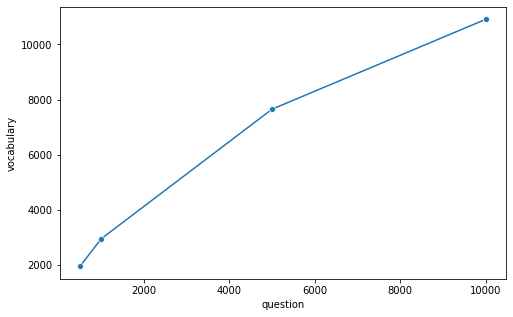

In [21]:
def count_terms(corpus, n):
    corpus_sub = corpus[0:n]
    vectorizer = CountVectorizer()
    model = vectorizer.fit(corpus_sub)
    return len(model.vocabulary_)

x = [500, 1000, 5000, 10000]
y = [count_terms(reddit_ques_corpus,num) for num in x]
df = pd.DataFrame({'question': x, 'vocabulary': y})

fig, ax = plt.subplots(figsize=(8, 5))
plot = sns.lineplot(x = 'question', y = 'vocabulary',data = df, marker="o")

This approach won't scale as we get more documents. 
- From the plot above we can find that as the number of documents increases, the slope becomes smaller and the vocabulary terms increases slower. Thus we can infer that the number of vocabulary terms will finally converge to a certain number with the increase of documents number. In other words, this approach won't scale. 

- From the common sense we know that the total vocabulary terms are limited and could not be infinite. Therefore, for any approach the number of vocabulary terms will not increase infinitely and will converge to a certain value, as well as this approach.